In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
!gdown 12G_J8gBel8MpspdXJruZuuMvyrm9upNb
!gdown 1-zjfYbZm8JC4wog9tG4zltMPuZM6p9_A


!gdown 1p03Ltdto8XoOdu14YlcQjzE-360SyI89
!gdown 1mNcWfaEW19ql8WCih6HiqRryCcjFUUqx

Downloading...
From: https://drive.google.com/uc?id=12G_J8gBel8MpspdXJruZuuMvyrm9upNb
To: /content/X_test.csv
100% 51.7k/51.7k [00:00<00:00, 71.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-zjfYbZm8JC4wog9tG4zltMPuZM6p9_A
To: /content/X_train.csv
100% 154k/154k [00:00<00:00, 108MB/s]
Downloading...
From: https://drive.google.com/uc?id=1p03Ltdto8XoOdu14YlcQjzE-360SyI89
To: /content/y_test.csv
100% 743/743 [00:00<00:00, 1.49MB/s]
Downloading...
From: https://drive.google.com/uc?id=1mNcWfaEW19ql8WCih6HiqRryCcjFUUqx
To: /content/y_train.csv
100% 2.21k/2.21k [00:00<00:00, 4.39MB/s]


In [3]:
X_train = pd.read_csv('X_train.csv')
X_test = pd.read_csv('X_test.csv')
y_train = pd.read_csv('y_train.csv')
y_test = pd.read_csv('y_test.csv')

In [4]:
X_train.head()

,Age,DailyRate,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,36,1174,3,4,0.233871,1,0,99,3,2,...,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,21,546,5,1,0.127479,3,1,97,3,1,...,2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,43,422,1,3,0.151584,4,0,33,3,2,...,2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,42,188,29,3,0.127479,2,1,56,1,2,...,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,35,992,1,3,0.127479,4,1,68,2,1,...,2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [5]:
X_train.shape

(1102, 36)

In [6]:
X_test.shape

(368, 36)

In [7]:
y_train.value_counts(normalize=True)

Target
0         0.838475
1         0.161525
dtype: float64

In [8]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()

X_sm, y_sm = sm.fit_resample(X_train, y_train)

In [9]:
y_sm.shape

(1848, 1)

In [10]:
y_sm.value_counts(normalize=True)

Target
0         0.5
1         0.5
dtype: float64

# sklearn decision tree

In [11]:
from sklearn.tree import DecisionTreeClassifier

In [12]:
train_acc = []
test_acc = []

In [13]:
for depth in range(2, 20):
    model = DecisionTreeClassifier(criterion='entropy', max_depth=depth)
    model.fit(X_sm, y_sm)

    tr_acc = model.score(X_sm, y_sm)    
    te_acc = model.score(X_test, y_test)

    train_acc.append(tr_acc)
    test_acc.append(te_acc)

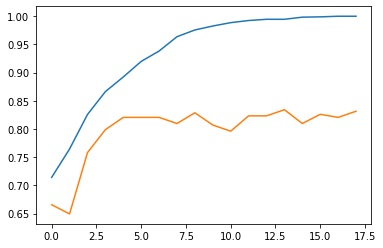

In [14]:
plt.plot(train_acc)
plt.plot(test_acc)

In [15]:
test_acc[:5]

[0.6657608695652174,
 0.6494565217391305,
 0.7581521739130435,
 0.7989130434782609,
 0.8206521739130435]

In [16]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=4)
model.fit(X_sm, y_sm)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [17]:
model.score(X_test, y_test)

0.7581521739130435

In [18]:
model.score(X_sm, y_sm)

0.8257575757575758

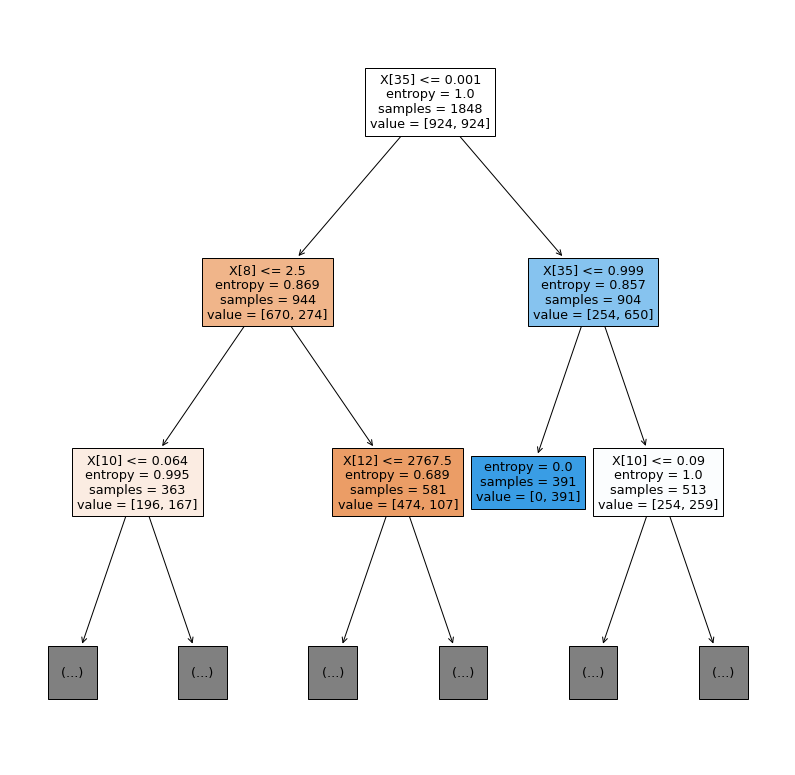

In [19]:
# graphviz

from sklearn.tree import plot_tree
plt.figure(figsize=(14,14))
plot_tree(model, max_depth=2, filled = True);

In [20]:
importances = model.feature_importances_
importances

array([0.01242734, 0.        , 0.        , 0.        , 0.        ,
       0.03248824, 0.        , 0.        , 0.07080059, 0.        ,
       0.12537183, 0.05427836, 0.04166636, 0.00608355, 0.        ,
       0.02496304, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.01102618,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.62089451])

In [21]:
names = X_train.columns

In [22]:
indices = np.argsort(importances)[::-1]
indices

array([35, 10,  8, 11, 12,  5, 15,  0, 29, 13, 26,  1,  2,  3,  4, 33,  6,
        7, 32,  9, 31, 30, 27, 14, 28, 16, 34, 18, 19, 20, 21, 22, 23, 24,
       25, 17])

In [23]:
names[indices]

Index(['MaritalStatus_Single', 'JobRole', 'JobInvolvement', 'JobSatisfaction',
       'MonthlyIncome', 'EnvironmentSatisfaction', 'OverTime', 'Age',
       'BusinessTravel_Travel_Rarely', 'MonthlyRate', 'YearsWithCurrManager',
       'DailyRate', 'DistanceFromHome', 'Education', 'EducationField',
       'MaritalStatus_Divorced', 'Gender', 'HourlyRate', 'Department_Sales',
       'JobLevel', 'Department_Research & Development',
       'Department_Human Resources', 'BusinessTravel_Non-Travel',
       'NumCompaniesWorked', 'BusinessTravel_Travel_Frequently',
       'PercentSalaryHike', 'MaritalStatus_Married',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'PerformanceRating'],
      dtype='object')

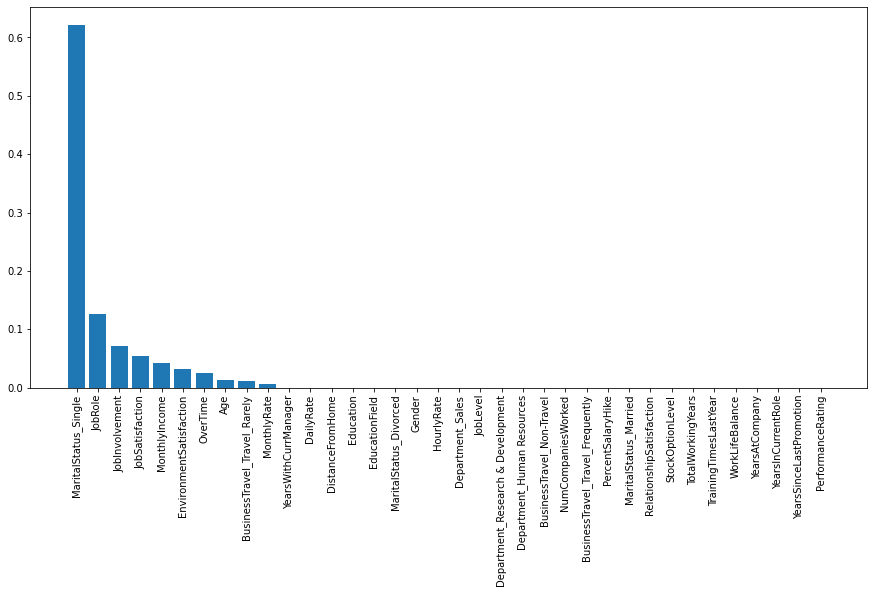

In [24]:
plt.figure(figsize=(15, 7))
plt.bar(range(len(X_train.columns)), importances[indices])
plt.xticks(range(len(X_train.columns)),names[indices], rotation = 90 )
plt.show()

# RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier(n_estimators=300, max_depth = 7, ccp_alpha= 0.001)

In [ ]:
from sklearn.model_selection import cross_val_score, cross_validate

In [ ]:
results = cross_validate(rfc, X_sm, y_sm, scoring='accuracy', cv=10, return_train_score=True )

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

In [ ]:
results['train_score'].mean()

0.9593555581895554

In [ ]:
results['test_score'].mean()

0.8999676850763807

In [ ]:
rfc.fit(X_sm, y_sm)

<ipython-input-66-e9ffe1ee58d4>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_sm, y_sm)


RandomForestClassifier(max_depth=7, n_estimators=300)

In [ ]:
rfc.estimators_[:5]

[DecisionTreeClassifier(max_depth=7, max_features='auto',
                        random_state=1047849819),
 DecisionTreeClassifier(max_depth=7, max_features='auto', random_state=969689503),
 DecisionTreeClassifier(max_depth=7, max_features='auto', random_state=556156683),
 DecisionTreeClassifier(max_depth=7, max_features='auto',
                        random_state=1212298413),
 DecisionTreeClassifier(max_depth=7, max_features='auto',
                        random_state=1346762697)]

In [ ]:
importances = rfc.feature_importances_
importances

array([0.018074  , 0.01618109, 0.01764432, 0.01015443, 0.06497407,
       0.03530044, 0.00570177, 0.01711083, 0.03618998, 0.02574756,
       0.0901833 , 0.02559795, 0.05799174, 0.02094695, 0.00809317,
       0.01609185, 0.00843992, 0.00183347, 0.01976843, 0.05287619,
       0.0205582 , 0.01293478, 0.01277829, 0.0178462 , 0.01789457,
       0.01062738, 0.0171065 , 0.00596713, 0.03514672, 0.01218404,
       0.00361094, 0.04584995, 0.04390677, 0.03165989, 0.06134469,
       0.1016825 ])

In [ ]:
indices = np.argsort(importances)[::-1]
indices

array([35, 10,  4, 34, 12, 19, 31, 32,  8,  5, 28, 33,  9, 11, 13, 20, 18,
        0, 24, 23,  2,  7, 26,  1, 15, 21, 22, 29, 25,  3, 16, 14, 27,  6,
       30, 17])

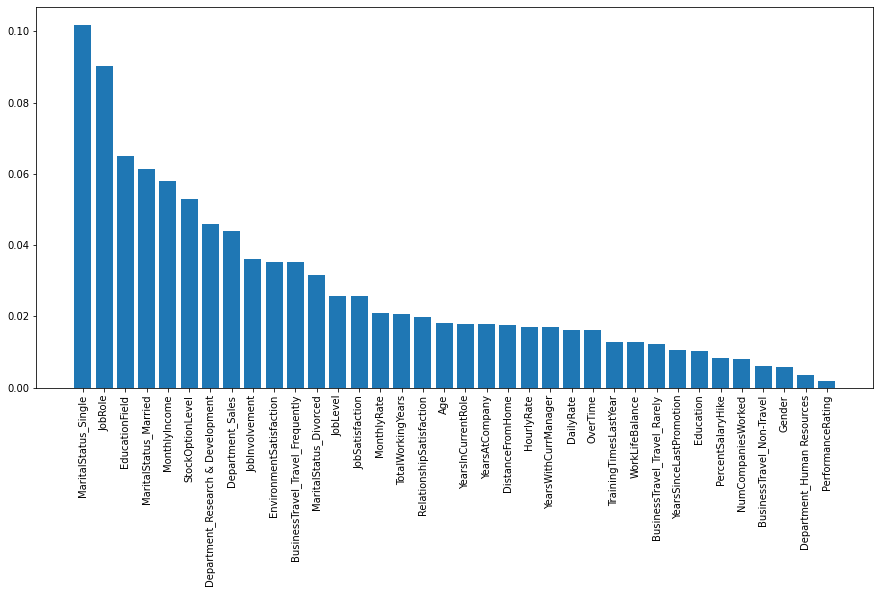

In [ ]:
plt.figure(figsize=(15, 7))
plt.bar(range(len(X_train.columns)), importances[indices])
plt.xticks(range(len(X_train.columns)),names[indices], rotation = 90 )
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
params = {
    'max_depth' :[5, 7, 10],
    'n_estimators': [100,200, 300, 500],
    'max_features' : [10, 12, 15]
}

In [ ]:
grid = GridSearchCV(rfc, param_grid=params, scoring='accuracy', cv=3, return_train_score=True, n_jobs=-1)

In [ ]:
grid.fit(X_sm, y_sm)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=3,
             estimator=RandomForestClassifier(ccp_alpha=0.001, max_depth=7,
                                              n_estimators=300),
             n_jobs=-1,
             param_grid={'max_depth': [5, 7, 10], 'max_features': [10, 12, 15],
                         'n_estimators': [100, 200, 300, 500]},
             return_train_score=True, scoring='accuracy')

In [ ]:
grid.best_score_

0.8966450216450217

In [ ]:
grid.best_params_

{'max_depth': 10, 'max_features': 10, 'n_estimators': 200}

In [ ]:
best_model = grid.best_estimator_
best_model

RandomForestClassifier(ccp_alpha=0.001, max_depth=10, max_features=10,
                       n_estimators=200)

# **GBDT**

In [25]:
from sklearn.ensemble import GradientBoostingClassifier

In [60]:
gbc = GradientBoostingClassifier(n_estimators=100, max_depth=2, learning_rate=0.1)

In [61]:
gbc.fit(X_sm, y_sm)

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(max_depth=2)

In [62]:
gbc.score(X_test, y_test)

0.8777173913043478

In [63]:
gbc.score(X_sm, y_sm)

0.9356060606060606